In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('../RawData/Diet-Compositions/Diet compositions by commodity categories - FAO (2017).csv')

In [15]:
df.head()

,Entity,Year,Cereals and Grains (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)
0,Afghanistan,1961,2530,16,25,51,92,88,102,82,13,0.0
1,Afghanistan,1962,2458,17,22,45,98,88,101,76,12,0.0
2,Afghanistan,1963,2212,17,23,47,106,91,110,79,13,0.0
3,Afghanistan,1964,2445,18,24,55,102,93,110,95,11,0.0
4,Afghanistan,1965,2431,18,24,57,105,95,118,95,13,0.0


In [16]:
df.isnull().sum()

Entity                                                                  0
Year                                                                    0
Cereals and Grains (FAO (2017)) (kilocalories per person per day)       0
Pulses (FAO (2017)) (kilocalories per person per day)                   0
Starchy Roots (FAO (2017)) (kilocalories per person per day)            0
Sugar (FAO (2017)) (kilocalories per person per day)                    0
Oils & Fats (FAO (2017)) (kilocalories per person per day)              0
Meat (FAO (2017)) (kilocalories per person per day)                     0
Dairy & Eggs (FAO (2017)) (kilocalories per person per day)             0
Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)     0
Other (FAO (2017)) (kilocalories per person per day)                    0
Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)     53
dtype: int64

In [17]:
df.columns

Index(['Entity', 'Year',
       'Cereals and Grains (FAO (2017)) (kilocalories per person per day)',
       'Pulses (FAO (2017)) (kilocalories per person per day)',
       'Starchy Roots (FAO (2017)) (kilocalories per person per day)',
       'Sugar (FAO (2017)) (kilocalories per person per day)',
       'Oils & Fats (FAO (2017)) (kilocalories per person per day)',
       'Meat (FAO (2017)) (kilocalories per person per day)',
       'Dairy & Eggs (FAO (2017)) (kilocalories per person per day)',
       'Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)',
       'Other (FAO (2017)) (kilocalories per person per day)',
       'Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 12 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Entity                                                               8154 non-null   object 
 1   Year                                                                 8154 non-null   int64  
 2   Cereals and Grains (FAO (2017)) (kilocalories per person per day)    8154 non-null   int64  
 3   Pulses (FAO (2017)) (kilocalories per person per day)                8154 non-null   int64  
 4   Starchy Roots (FAO (2017)) (kilocalories per person per day)         8154 non-null   int64  
 5   Sugar (FAO (2017)) (kilocalories per person per day)                 8154 non-null   int64  
 6   Oils & Fats (FAO (2017)) (kilocalories per person per day)           8154 non-null   int64  
 7   Meat (

In [19]:
df['Protein_kcal'] = df['Meat (FAO (2017)) (kilocalories per person per day)'] + \
                     df['Dairy & Eggs (FAO (2017)) (kilocalories per person per day)'] + \
                     df['Pulses (FAO (2017)) (kilocalories per person per day)']

df['Fiber_kcal'] = df['Cereals and Grains (FAO (2017)) (kilocalories per person per day)'] + \
                   df['Pulses (FAO (2017)) (kilocalories per person per day)'] + \
                   df['Starchy Roots (FAO (2017)) (kilocalories per person per day)'] + \
                   df['Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)']

nutrient_columns = {
    'Sugar (FAO (2017)) (kilocalories per person per day)': 'Sugar_kcal',
    'Oils & Fats (FAO (2017)) (kilocalories per person per day)': 'Fat_kcal',
    'Protein_kcal': 'Protein_kcal',
    'Fiber_kcal': 'Fiber_kcal'
}

per_capita_nutrient_consumption = df.groupby('Entity')[list(nutrient_columns.keys())].mean()
per_capita_nutrient_consumption = per_capita_nutrient_consumption.rename(columns=nutrient_columns)

print("First 5 rows of the per capita nutrient consumption DataFrame:")
print(per_capita_nutrient_consumption.head())

First 5 rows of the per capita nutrient consumption DataFrame:
                     Sugar_kcal    Fat_kcal  Protein_kcal   Fiber_kcal
Entity                                                                
Afghanistan           56.698113  133.188679    226.245283  1938.622642
Albania              167.981132  259.735849    512.584906  1708.169811
Algeria              237.792453  314.339623    277.849057  1675.811321
Angola               114.226415  217.528302    221.566038  1358.509434
Antigua and Barbuda  329.773585  305.320755    589.150943   857.000000


In [20]:
nutrient_list = ['Sugar_kcal', 'Fat_kcal', 'Protein_kcal', 'Fiber_kcal']

for nutrient in nutrient_list:
    print(f"\nTop 10 Countries for {nutrient.replace('_kcal', '')} Consumption:")
    top_countries = per_capita_nutrient_consumption.sort_values(by=nutrient, ascending=False).head(10)
    print(top_countries[[nutrient]])


Top 10 Countries for Sugar Consumption:
                     Sugar_kcal
Entity                         
Colombia             583.245283
United States        582.849057
Cuba                 557.396226
Costa Rica           551.943396
Barbados             541.094340
Iceland              517.169811
Trinidad and Tobago  512.207547
New Zealand          504.830189
Belgium              501.571429
Malta                500.924528

Top 10 Countries for Fat Consumption:
                  Fat_kcal
Entity                    
Belgium        1004.642857
Kiribati        824.433962
Austria         803.867925
Canada          738.358491
Italy           726.056604
Germany         721.792453
United States   714.094340
Denmark         711.509434
Greece          707.245283
Samoa           690.660377

Top 10 Countries for Protein Consumption:
                Protein_kcal
Entity                      
Iceland          1216.905660
Luxembourg       1113.357143
Montenegro       1036.000000
Finland          1007.81

In [21]:
df.head()

,Entity,Year,Cereals and Grains (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day),Protein_kcal,Fiber_kcal
0,Afghanistan,1961,2530,16,25,51,92,88,102,82,13,0.0,206,2653
1,Afghanistan,1962,2458,17,22,45,98,88,101,76,12,0.0,206,2573
2,Afghanistan,1963,2212,17,23,47,106,91,110,79,13,0.0,218,2331
3,Afghanistan,1964,2445,18,24,55,102,93,110,95,11,0.0,221,2582
4,Afghanistan,1965,2431,18,24,57,105,95,118,95,13,0.0,231,2568


/var/folders/cr/2thq8qhx32sdzjtfv83rs46h0000gn/T/ipykernel_95212/2269606671.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries[nutrient], palette='viridis')


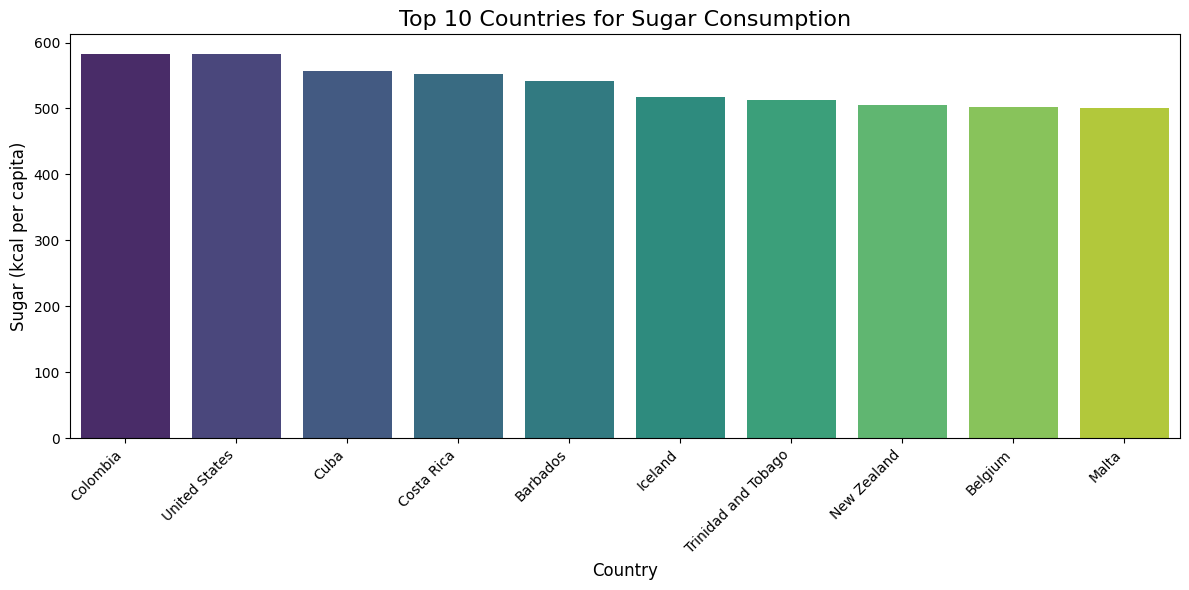

/var/folders/cr/2thq8qhx32sdzjtfv83rs46h0000gn/T/ipykernel_95212/2269606671.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries[nutrient], palette='viridis')


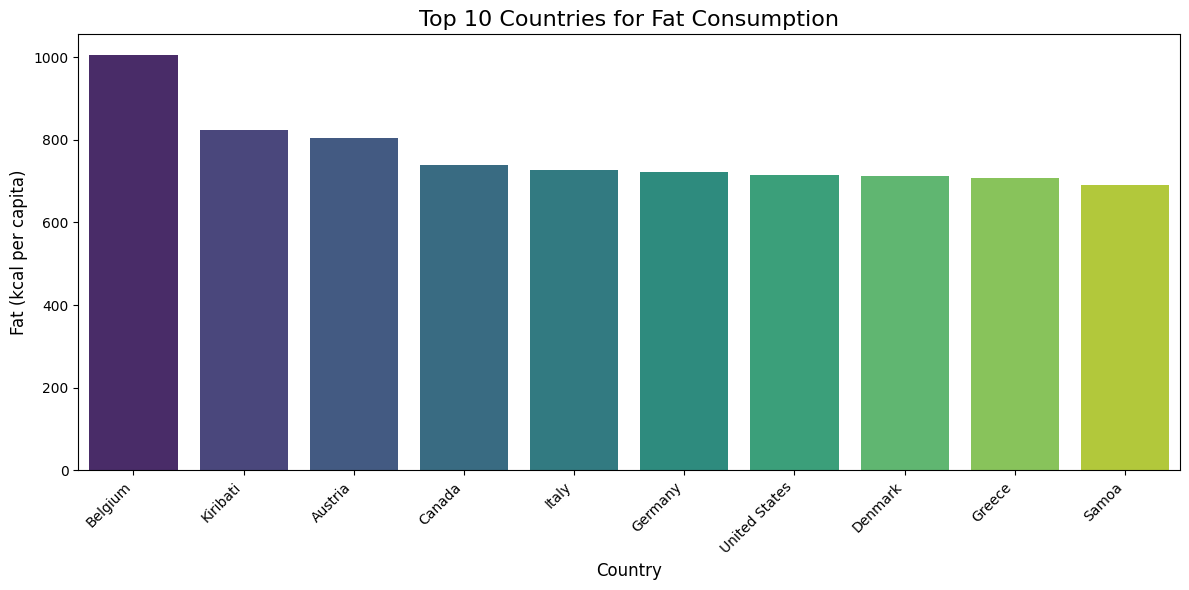

/var/folders/cr/2thq8qhx32sdzjtfv83rs46h0000gn/T/ipykernel_95212/2269606671.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries[nutrient], palette='viridis')


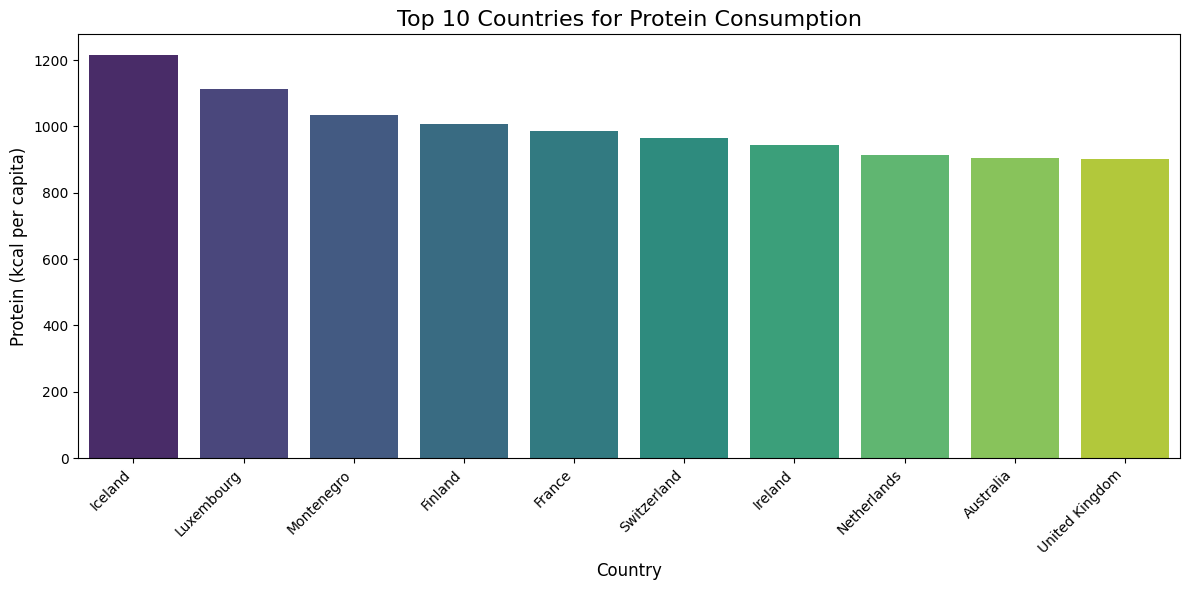

/var/folders/cr/2thq8qhx32sdzjtfv83rs46h0000gn/T/ipykernel_95212/2269606671.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries[nutrient], palette='viridis')


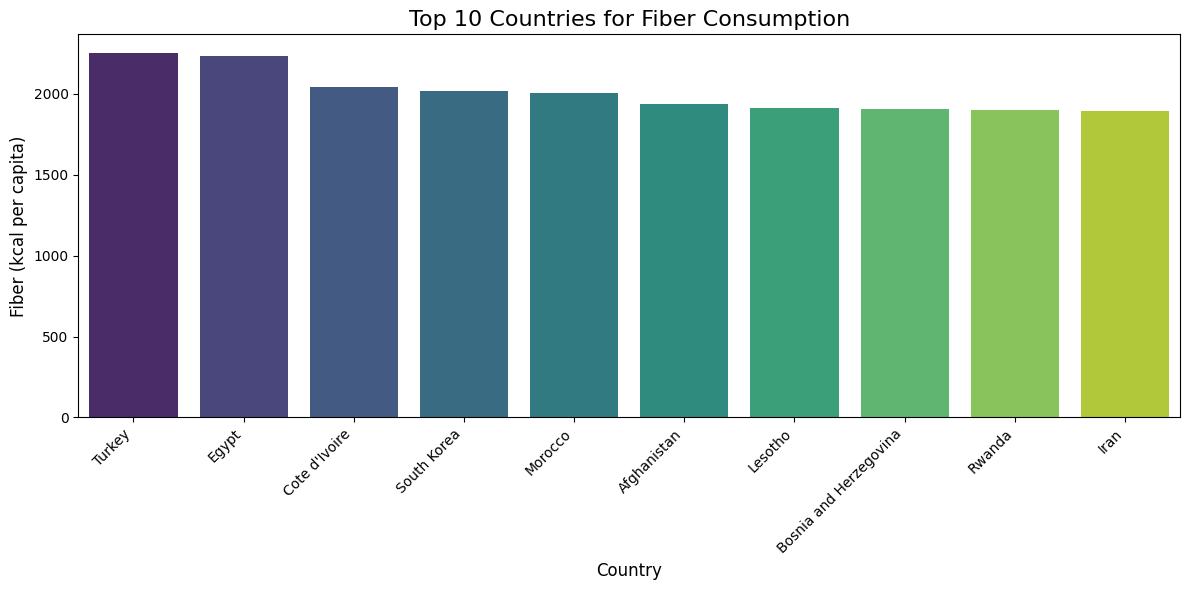

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

nutrient_list = ['Sugar_kcal', 'Fat_kcal', 'Protein_kcal', 'Fiber_kcal']

for nutrient in nutrient_list:
    # Get the top 10 countries for the current nutrient
    top_countries = per_capita_nutrient_consumption.sort_values(by=nutrient, ascending=False).head(10)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_countries.index, y=top_countries[nutrient], palette='viridis')

    # Set title and labels
    plt.title(f'Top 10 Countries for {nutrient.replace("_kcal", "")} Consumption', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel(f'{nutrient.replace("_kcal", "")} (kcal per capita)', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Ensure tight layout
    plt.tight_layout()

    # Display the plot
    plt.show()

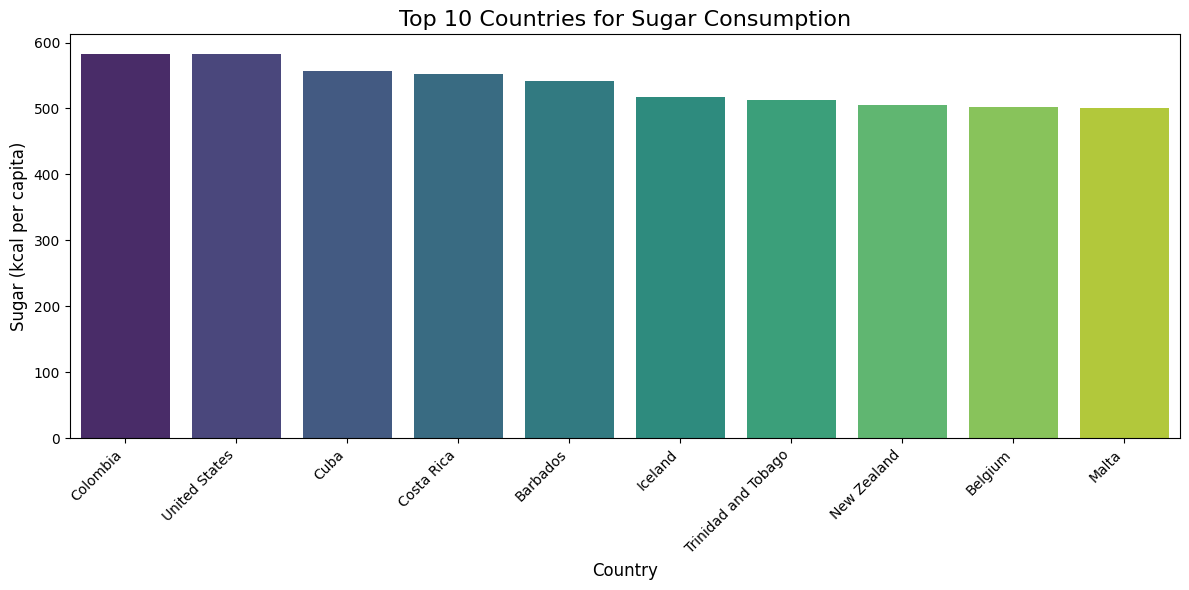

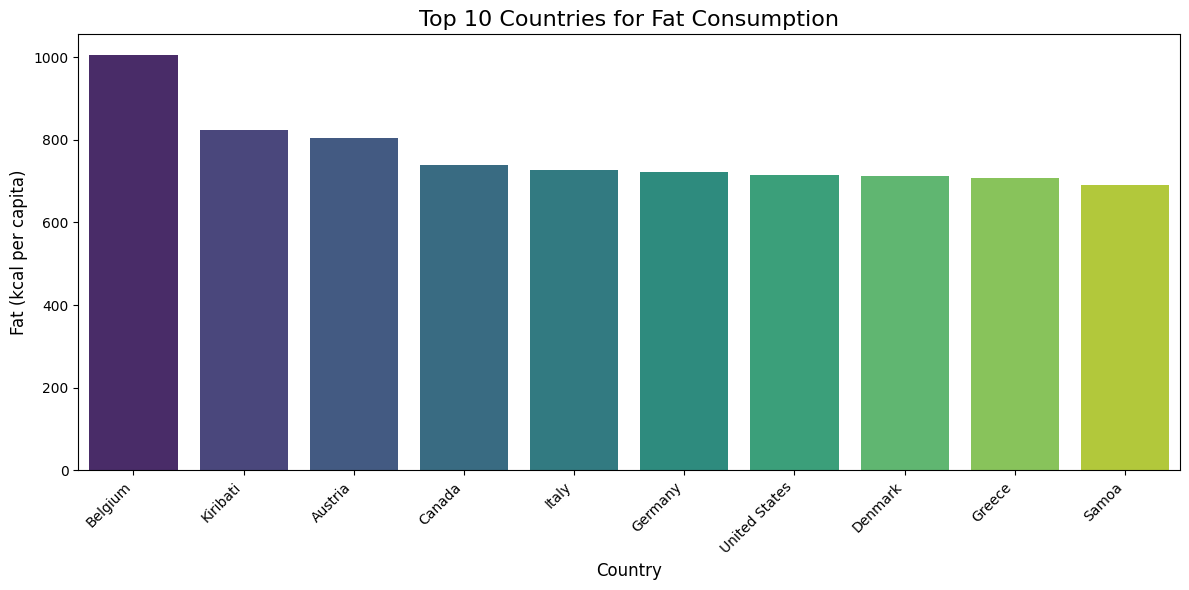

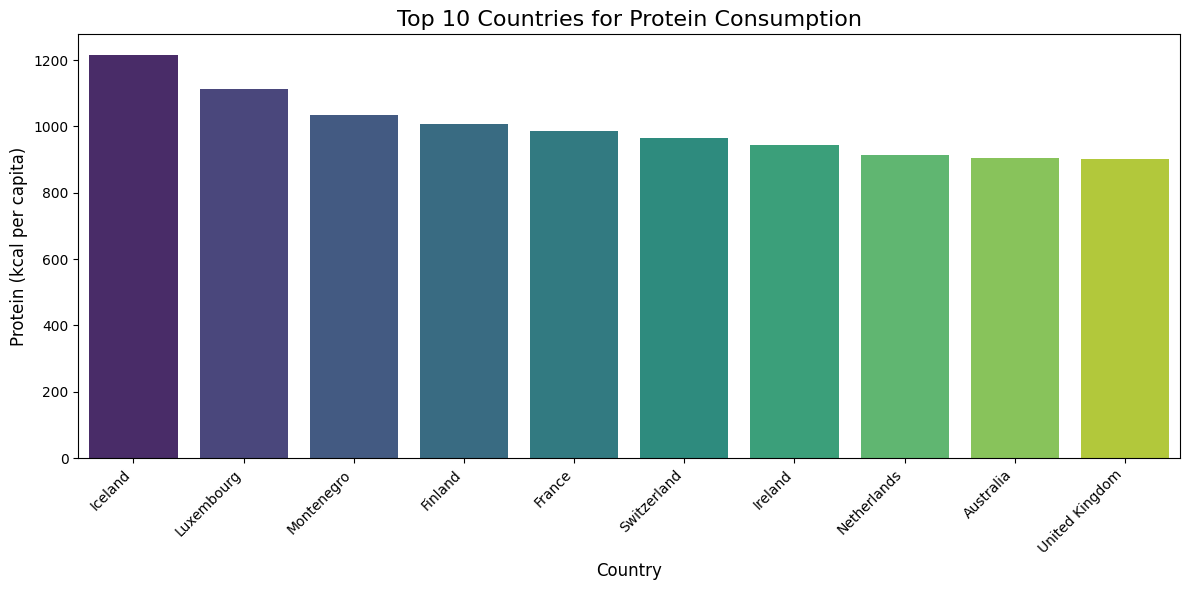

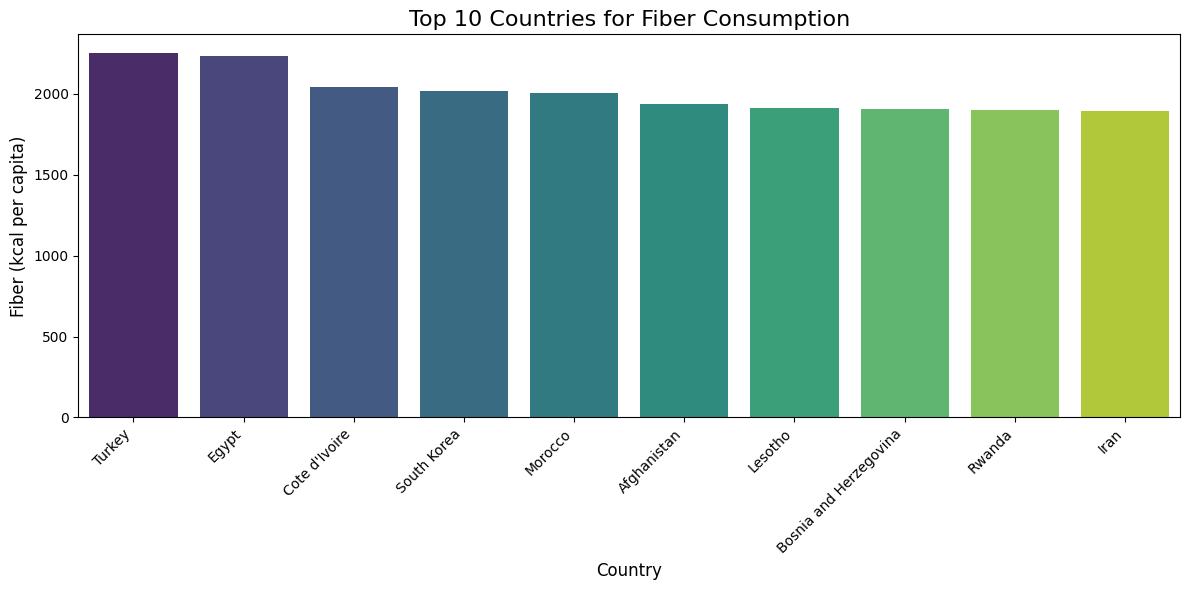

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

nutrient_list = ['Sugar_kcal', 'Fat_kcal', 'Protein_kcal', 'Fiber_kcal']

for nutrient in nutrient_list:
    # Get the top 10 countries for the current nutrient
    top_countries = per_capita_nutrient_consumption.sort_values(by=nutrient, ascending=False).head(10)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_countries.index, y=top_countries[nutrient], palette='viridis', hue=top_countries.index, legend=False)

    # Set title and labels
    plt.title(f'Top 10 Countries for {nutrient.replace("_kcal", "")} Consumption', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel(f'{nutrient.replace("_kcal", "")} (kcal per capita)', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Ensure tight layout
    plt.tight_layout()

    # Display the plot
    plt.show()